<a href="https://colab.research.google.com/github/tedkoo0212/Tensorflow/blob/main/CNN%5BTensorflow_102%5D_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#딥러닝 공부 시 용어 지옥
# 1. 생소한 용어가 너무 많다.
# 2. 하나의 대상을 부르는 다양한 표현이 있다.
# 3. 하나의 표현이 몇가지 다른 의미로 해석되는 경우가 있다.

In [4]:
import tensorflow as tf
import pandas as pd

In [1]:
#이미지 데이터 구경하기

MNIST : 손글씨 (흑백)

ex) 숫자 5 : 개별 Mnist - (28,28) 각 숫자 1개는 까맣고 하얀 정도를 나타낸다. 
0에 가까우면 검은색 255에 가까우면 흰색.
[총 숫자 갯수=28*28=784]

2차원 형태, 784차원 공간의 한 점

60000장 이라면 -> 이미지셋 (60000,28,28)

SyntaxError: ignored

In [3]:
# CIFAR10 : 그림 (칼라)

32*32
흑백과 다른점: 2차원 숫자 집합(32*32)가 3개 존재한다. (빨강,초록,파랑)
즉, 다르게 생각하면, 각 칸에 32*32의 모든 칸에 3개의 값을 가지는 것이다.(0-255 사이의 값; 색깔의 농도를 나타냄)

개별 cifar10 - (32,32,3) : 3차원 형태, 3072차원 공간의 한 점


SyntaxError: ignored

In [8]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
170500096/170498071 [==============================] - 7s 0us/step
(50000, 32, 32, 3) (50000, 1)


### 1 . 화면 출력

[5 0 4 1 9 2 1 3 1 4]


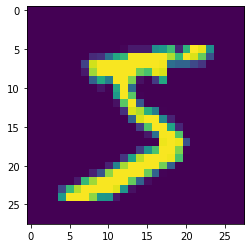

In [12]:
import matplotlib.pyplot as plt
plt.imshow(mnist_x[0])
print(mnist_y[0:10])


[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
AxesImage(54,36;334.8x217.44)


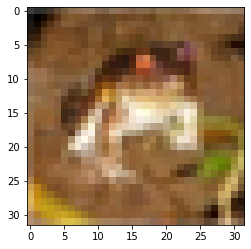

In [16]:
print(cifar_y[0:10])
x1 = plt.imshow(cifar_x[0])
print(x1)

plt.imshow(cifar_x[0]) 를 해도 되고

x1 = plt.imshow(cifar_x[0])
print(x1) 을 해도 동일한 결과가 나온다.

하지만, 추측상, index를 통한 접근에서 제한이 있지 않을까 싶다. 

### 2 . 차원 확인

In [3]:
import numpy as np

d1 = np.array([1,2,3,4,5])
print(d1.shape)

d2 = np.array([d1,d1,d1,d1])
print(d2.shape)
#젠장, DHL처럼 DL을 쓰고 d1(숫자1)과 혼동해서 에러를 놓칠뻔.

d3 = np.array([d2,d2,d2])
print(d3.shape)
# 3차원

d4 = np.array([d3,d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [37]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [40]:
r1 = np.array([1,2,3,4,5])
print(r1.shape)

r2 = np.array([r1, r1, r1])
print(r2.shape)

(5,)
(3, 5)


In [19]:
s1 = np.array([1,2])
s2 = np.array([3,4,5])
s3 = np.array([6,0])
s4 = np.array([7,8,9,10])

s5 = np.array([[s1],[s2],[s3],[s4]])
print(s5.shape)
s6 = np.array([s1,s1,s1,s1])
print(s6.shape)
# (4,2) -> 2개짜리가 4개들어있다.

s7 = np.array([[1,2,3,4,5]])
print(s7.shape) #(1,5)

s8 = np.array([s7,s7,s7,s7])
print(s8.shape) #(4,1,5)

s9 = np.array([s8,s8])
print(s9.shape) #4차원 4-Dimensional

(4, 1)
(4, 2)
(1, 5)
(4, 1, 5)
(2, 4, 1, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [9]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [13]:
print(mnist_y[0:10])
print(mnist_y[0:10].shape)

x2 = np.array([[1,2,3,4,5]])
print(x2.shape)

[5 0 4 1 9 2 1 3 1 4]
(10,)
(1, 5)


In [14]:
# (5,1)만들기

# 나만의 해석: 크기 1 이 5개 (요소를 각각 하나씩 준다.)

x3 = np.array([[1],[1],[1],[1],[1]])
print(x3.shape)

(5, 1)


In [16]:
print(cifar_y[0:5]) # 1차원의 형태가 여러 개 들어가 있고, 그것이 모여 2차원의 형태를 이룬다.
print(cifar_y[0:5].shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
(5, 1)
